In [8]:
# Import the pandas library, which is essential for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = '../data/raw_analyst_ratings.csv'

# Load the CSV file into a pandas DataFrame.
# A DataFrame is like a table (rows and columns).
try:
    df = pd.read_csv(data_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}")
    print("Please make sure 'news_data.csv' is in a 'data' folder at the root of your project.")
    print("You might need to adjust the 'data_path' variable if your file is elsewhere.")


print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Information:")
print(df.info())

# Get descriptive statistics for numerical columns (if any exist, like headline_length later)
print("\nDescriptive Statistics for numerical columns:")
print(df.describe())

Data loaded successfully!

First 5 rows of the dataset:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06

In [ ]:
## 1.4 Descriptive Statistics

Here, we'll calculate basic statistics to understand the characteristics of our news data, such as headline lengths, popular publishers, and publication patterns.


Descriptive statistics for Headline Length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


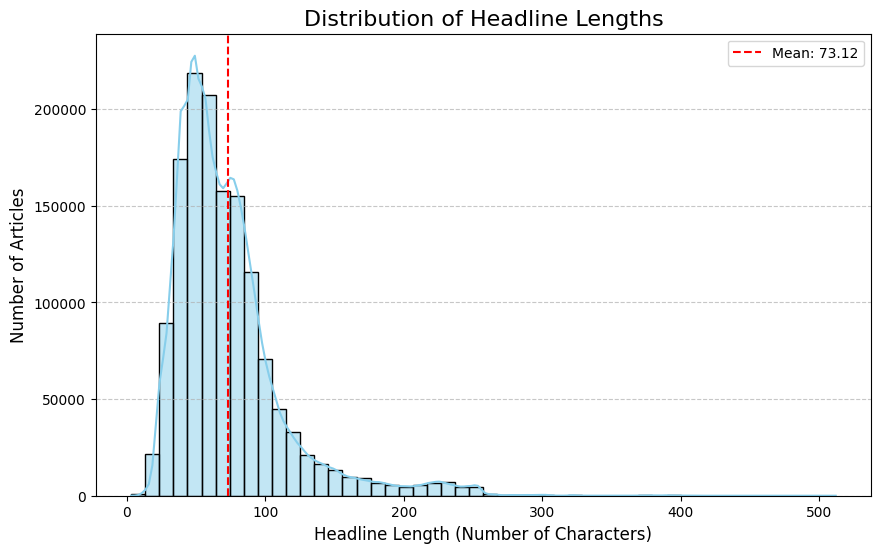

In [9]:
# Markdown Cell: "Analyzing the distribution of headline lengths."

if not df.empty:
    # 1. Calculate headline length
    df['headline_length'] = df['headline'].apply(len)

    print("\nDescriptive statistics for Headline Length:")
    print(df['headline_length'].describe())

    # 2. Visualize the distribution of headline lengths using a histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df['headline_length'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Headline Lengths', fontsize=16)
    plt.xlabel('Headline Length (Number of Characters)', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    # Add a vertical line for the mean to the plot
    plt.axvline(df['headline_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["headline_length"].mean():.2f}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("DataFrame is empty, skipping Headline Length Analysis.")

In [ ]:
**Observations on Publisher Analysis:**
* **[Publisher Name 1]** is the most prolific publisher, contributing **[Number]** articles, significantly more than others.
* The top few publishers (e.g., the top 5) account for a large proportion of the total news articles, indicating a concentration of news sources in this dataset.
* This insight might be important if certain publishers have a known bias or specialize in particular types of news.


Date Range of the dataset:
Start Date: 2011-04-27 21:01:48-04:00
End Date: 2020-06-11 17:12:35-04:00


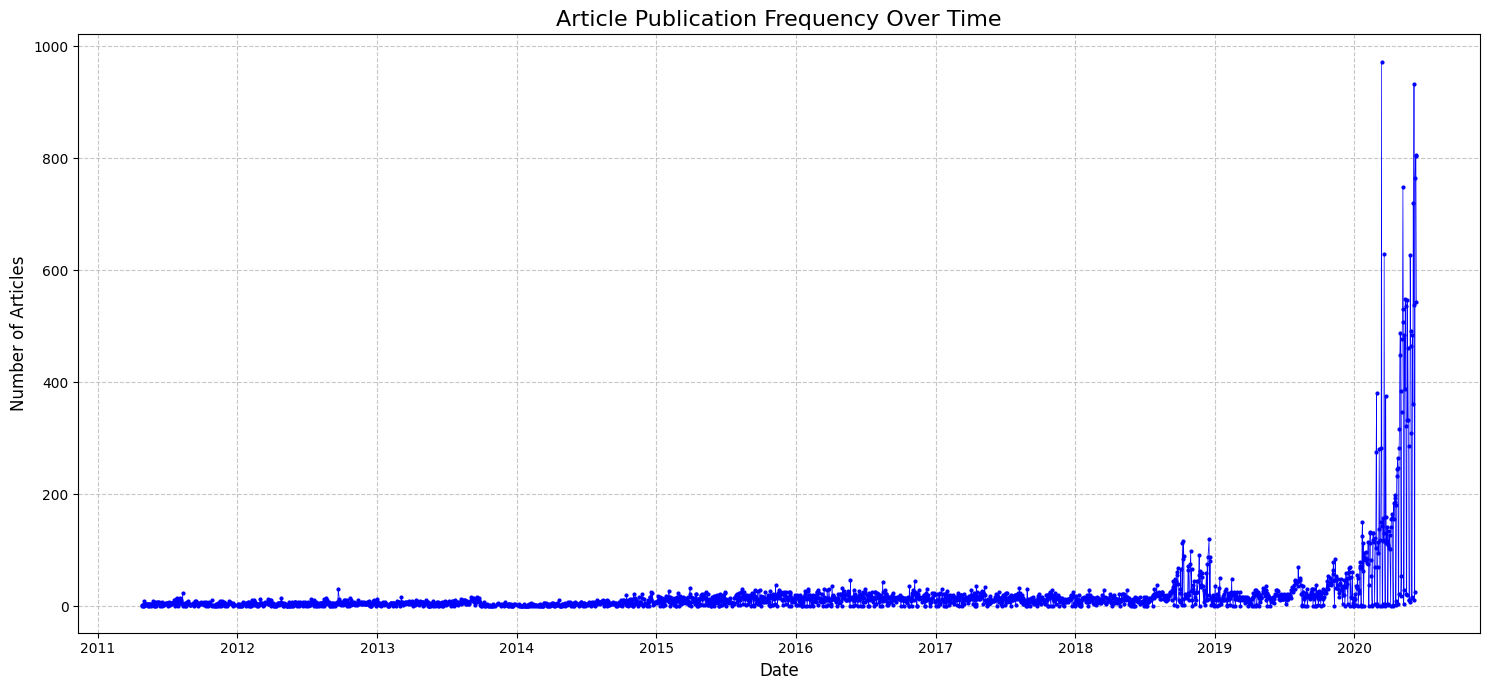

C:\Users\redie\AppData\Local\Temp\ipykernel_32492\3232887971.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['publication_day_of_week'], order=day_order, palette='cividis')


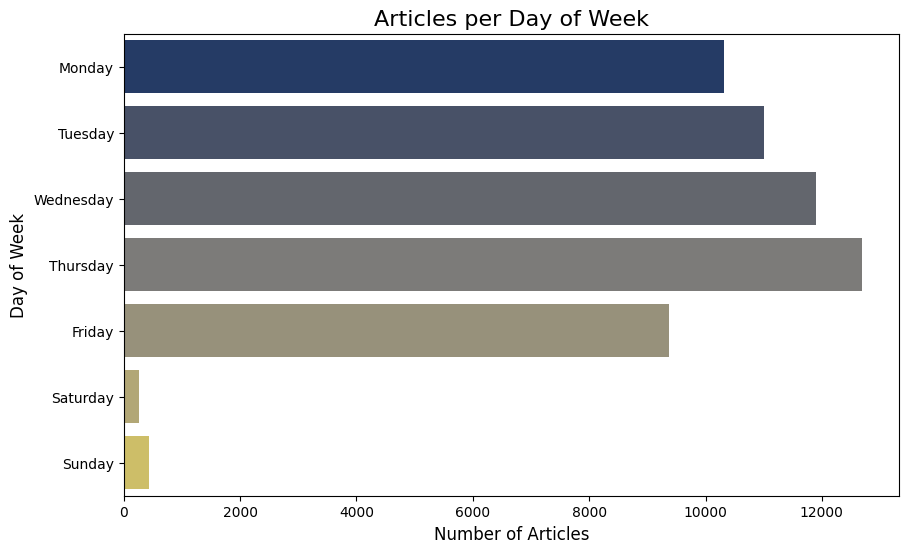

C:\Users\redie\AppData\Local\Temp\ipykernel_32492\3232887971.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['publication_hour'], palette='magma')


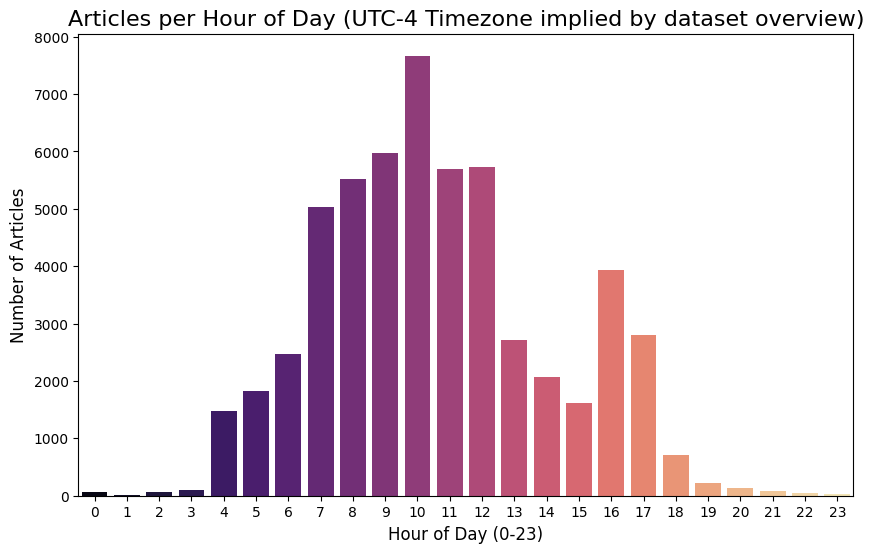

C:\Users\redie\AppData\Local\Temp\ipykernel_32492\3232887971.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['publication_month'], order=month_order, palette='plasma')


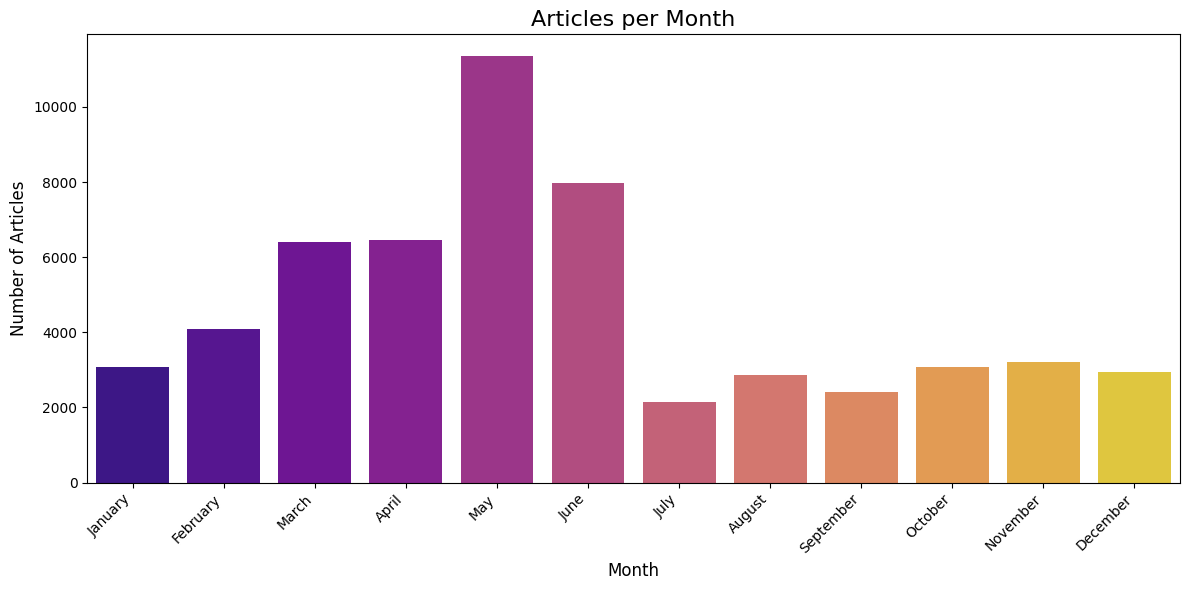

In [10]:
# Markdown Cell: "Analyzing publication date and time trends to understand news frequency patterns throughout the day, week, and over the entire period."

if not df.empty:
    # 1. Convert the 'date' column to datetime objects
    # This is crucial for time-series operations
    df['date'] = pd.to_datetime(df['date'], errors='coerce') # 'coerce' will turn unparseable dates into NaT (Not a Time)

    # Remove rows where date conversion failed (if any)
    df.dropna(subset=['date'], inplace=True)

    # Extract date components
    df['publication_date_only'] = df['date'].dt.date
    df['publication_day_of_week'] = df['date'].dt.day_name()
    df['publication_hour'] = df['date'].dt.hour
    df['publication_month'] = df['date'].dt.month_name()
    df['publication_year'] = df['date'].dt.year

    print("\nDate Range of the dataset:")
    print(f"Start Date: {df['date'].min()}")
    print(f"End Date: {df['date'].max()}")

    # 2. Articles per day (overall trend)
    articles_per_day = df['publication_date_only'].value_counts().sort_index()
    plt.figure(figsize=(15, 7))
    articles_per_day.plot(kind='line', marker='o', markersize=2, linewidth=0.5, color='blue')
    plt.title('Article Publication Frequency Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 3. Articles per day of the week
    plt.figure(figsize=(10, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.countplot(y=df['publication_day_of_week'], order=day_order, palette='cividis')
    plt.title('Articles per Day of Week', fontsize=16)
    plt.xlabel('Number of Articles', fontsize=12)
    plt.ylabel('Day of Week', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # 4. Articles per hour of the day
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['publication_hour'], palette='magma')
    plt.title('Articles per Hour of Day (UTC-4 Timezone implied by dataset overview)', fontsize=16)
    plt.xlabel('Hour of Day (0-23)', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # 5. Articles per month
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    sns.countplot(x=df['publication_month'], order=month_order, palette='plasma')
    plt.title('Articles per Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty, skipping Publication Date and Time Analysis.")

In [ ]:
## 1.5 Text Analysis (Keywords and N-grams)

This section focuses on extracting meaningful insights from the `headline` text itself. We'll identify the most frequently occurring words and phrases (N-grams) to understand the dominant topics and themes discussed in the financial news.

NLTK stopwords not found. Please run 'python -m nltk.downloader stopwords' in your terminal.

Most common words in headlines (after cleaning and stop word removal):
[('to', 15901), ('on', 13697), ('of', 13334), ('stocks', 12796), ('the', 11273), ('in', 11104), ('week', 8959), ('shares', 8375), ('for', 8357), ('from', 7355), ('that', 6785), ('trading', 6574), ('and', 6236), ('are', 6214), ('hit', 5898), ('eps', 5530), ('as', 5278), ('price', 5043), ('companies', 4778), ('target', 4675)]


C:\Users\redie\AppData\Local\Temp\ipykernel_32492\2231591012.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_words_df, palette='GnBu_r')


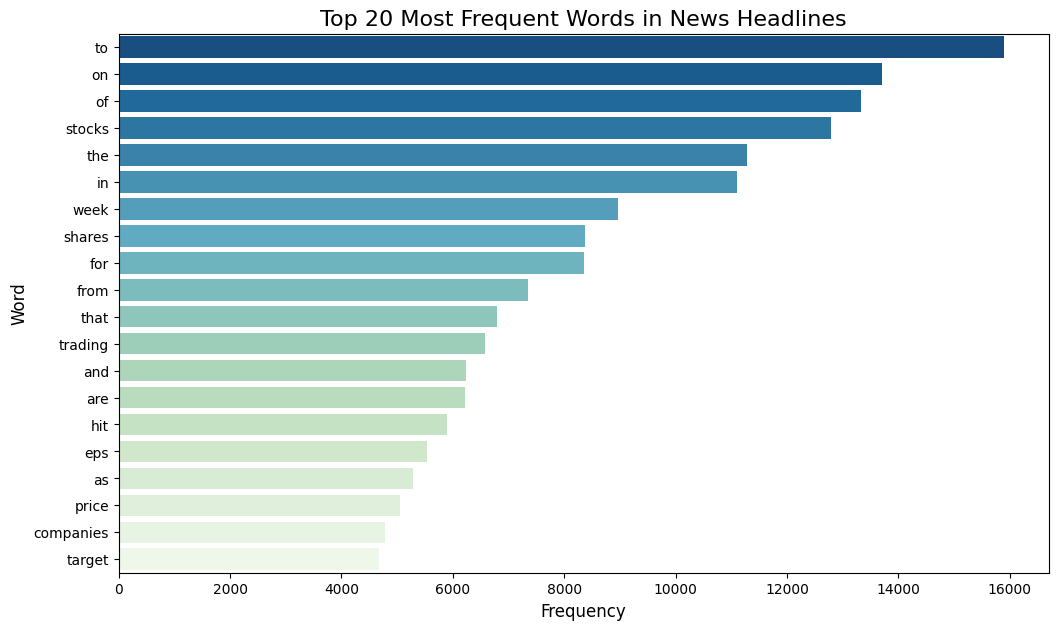

In [12]:
# Markdown Cell: "Cleaning headlines and identifying the most frequent single words."

import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
# IMPORTANT: Run these NLTK downloads in your terminal ONCE if you haven't already:
# python -m nltk.downloader stopwords
# python -m nltk.downloader punkt

if not df.empty:
    # Ensure NLTK stopwords are downloaded
    try:
        stop_words = set(stopwords.words('english'))
    except LookupError:
        print("NLTK stopwords not found. Please run 'python -m nltk.downloader stopwords' in your terminal.")
        stop_words = set() # Fallback to empty set if not found

    def clean_text(text):
        if pd.isna(text): # Handle potential NaN values in text column
            return ""
        text = text.lower() # Convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and numbers
        words = text.split()
        words = [word for word in words if word not in stop_words and len(word) > 1] # Remove stop words and single-char words
        return ' '.join(words)

    df['cleaned_headline'] = df['headline'].apply(clean_text)

    # Combine all cleaned words into a single list
    all_words = ' '.join(df['cleaned_headline']).split()

    # Count word frequencies
    word_freq = Counter(all_words)
    print("\nMost common words in headlines (after cleaning and stop word removal):")
    print(word_freq.most_common(20)) # Print the top 20 most common words

    # Visualize the top 20 words
    top_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Count'])
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Count', y='Word', data=top_words_df, palette='GnBu_r')
    plt.title('Top 20 Most Frequent Words in News Headlines', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

else:
    print("DataFrame is empty, skipping Word Frequency Analysis.")

In [ ]:
**Observations on Word Frequencies:**
* The most common words like "stock," "price," "market," "company," and "report" are highly relevant to financial news, as expected.
* Other frequent words such as "new," "high," "growth," "gain," and "loss" suggest common themes related to performance and movement.
* These frequent terms will likely be strong indicators when we perform sentiment analysis.


Most common bigrams (two-word phrases) in headlines:
[(('stocks', 'that'), 6104), (('hit', 'week'), 5846), (('that', 'hit'), 5844), (('are', 'trading'), 5569), (('shares', 'of'), 4820), (('price', 'target'), 4585), (('of', 'several'), 4438), (('companies', 'are'), 4089), (('week', 'lows'), 3687), (('target', 'to'), 3615), (('lows', 'on'), 3522), (('trading', 'higher'), 3518), (('stocks', 'moving'), 2841), (('moving', 'in'), 2839), (('week', 'highs'), 2560), (('highs', 'on'), 2313), (('on', 'thursday'), 2205), (('from', 'yoy'), 2185), (('trading', 'lower'), 2152), (('new', 'week'), 2094)]


C:\Users\redie\AppData\Local\Temp\ipykernel_32492\1037424436.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=top_bigrams_df, palette='cubehelix_r')


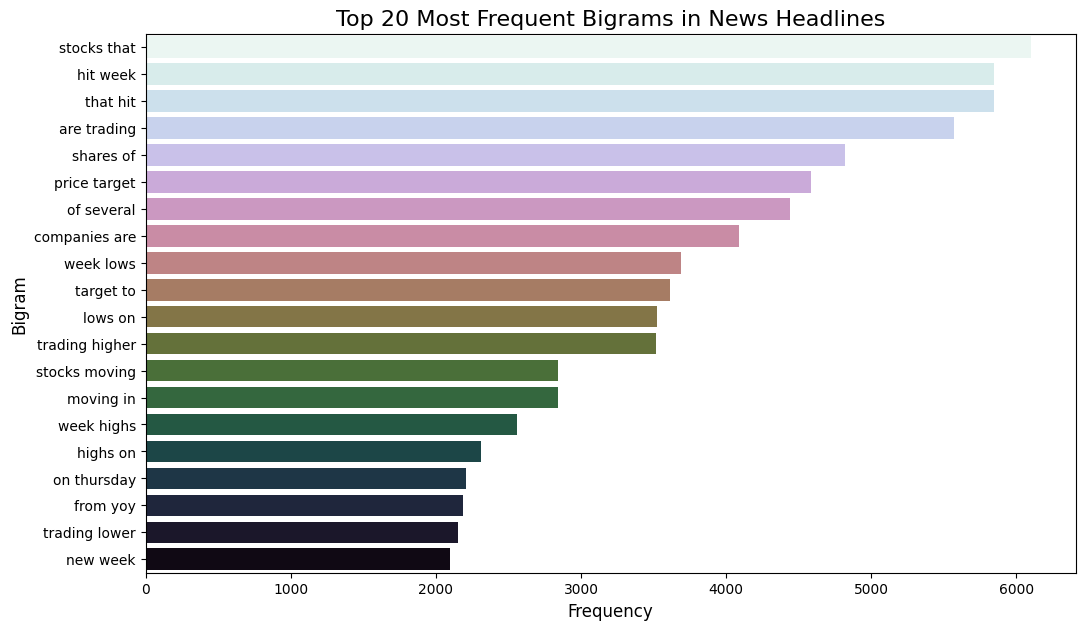

In [13]:
# Markdown Cell: "Identifying common two-word phrases (bigrams) to uncover recurring financial topics."

from nltk.util import ngrams

if not df.empty and 'cleaned_headline' in df.columns:
    # Recreate the list of all words from cleaned headlines
    all_words = ' '.join(df['cleaned_headline']).split()

    # Create a list of all bigrams (two-word phrases)
    all_bigrams = list(ngrams(all_words, 2))

    # Count bigram frequencies
    bigram_freq = Counter(all_bigrams)
    print("\nMost common bigrams (two-word phrases) in headlines:")
    print(bigram_freq.most_common(20))

    # Visualize the top 20 bigrams
    # Convert bigrams from tuples to strings for better plotting
    top_bigrams_df = pd.DataFrame([(' '.join(word_pair), count) for word_pair, count in bigram_freq.most_common(20)],
                                  columns=['Bigram', 'Count'])
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Count', y='Bigram', data=top_bigrams_df, palette='cubehelix_r')
    plt.title('Top 20 Most Frequent Bigrams in News Headlines', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Bigram', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

else:
    print("DataFrame is empty or 'cleaned_headline' column missing, skipping Bigram Analysis.")

In [ ]:
**Observations on N-gram Frequencies:**
* Common bigrams like "price target," "earnings report," "stock market," and "new high" precisely reflect recurring topics in financial news.
* These phrases provide more specific context than single words and are strong indicators of the detailed subjects of the articles. For instance, "price target" directly relates to analyst expectations, while "earnings report" indicates quarterly financial performance news.
* These will be particularly useful for understanding the nuances of sentiment.

In [ ]:
## 1.6 Saving Processed Data

After performing EDA and adding new features like `headline_length` and `cleaned_headline`, it's good practice to save this enriched DataFrame. This prevents needing to re-run all the EDA steps every time you start a new analysis for subsequent tasks.

In [15]:
# Markdown Cell: "Saving the DataFrame with new EDA-derived features."

if not df.empty:
    # Define the path where you want to save the processed data.
    # Create a 'processed_data' folder inside your 'data' folder first if it doesn't exist:
    # e.g., B5W1-News-Sentiment-Analysis/data/processed_data/
    output_path = '../data/processed_data/financial_news_eda_processed.csv'

    # Save the DataFrame to a new CSV file
    # index=False prevents pandas from writing the DataFrame index as a column in the CSV
    df.to_csv(output_path, index=False)
    print(f"\nProcessed DataFrame with EDA features saved to: {output_path}")
else:
    print("DataFrame is empty, nothing to save.")


Processed DataFrame with EDA features saved to: ../data/processed_data/financial_news_eda_processed.csv


In [ ]:
## 1.7 Task 1 Conclusion & Key Insights

This EDA process has provided a foundational understanding of our financial news dataset:

* **Data Structure:** We've confirmed the types and presence of key columns (`headline`, `publisher`, `date`, `stock`).
* **Headline Characteristics:** Headlines are generally concise, with an average length around [Mean Headline Length] characters, focusing on direct financial information.
* **Publisher Influence:** A few major publishers dominate the news volume, which could imply certain biases or specializations that might be worth further investigation.
* **Temporal Patterns:** News flow exhibits strong daily and weekly patterns, heavily concentrated during market hours, highlighting the time-sensitive nature of financial news. This will be crucial for aligning news with stock price movements.
* **Topical Focus:** Common words and bigrams like "price target," "earnings report," "stock market," and company names clearly indicate the dataset's focus on corporate and market performance. These terms will be vital for sentiment analysis.

These insights will guide our approach in **Task 2 (Quantitative Analysis)**, where we'll integrate stock price data and technical indicators, and **Task 3 (Correlation Analysis)**, where we'll link news sentiment to stock price movements.

**Next Steps (For your own work):**
* Ensure all plots are clearly labeled and interpretable.
* Review your observations and ensure they are insightful and directly related to the data.
* Commit your Jupyter Notebook and any saved processed data to your `task-1` branch on GitHub.